In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
weather = pd.read_csv('weatherAUS.csv')

In [3]:
# First 5 rows
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# weather rows and columns
weather.shape

(145460, 23)

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Preprocessing

In [6]:
#Check for any missing value
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
categorical_features = list(weather.select_dtypes(include='object').columns)
numerical_features = list(weather.select_dtypes(exclude='object').columns)

In [8]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [9]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
weather[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [11]:
# Fill in missing values in the 'RainTomorrow' column of the data frame 'weather' with 
# the most common value (the mode) of the column. 
# The inplace=True argument makes the changes to the data frame itself, rather than returning a new one.

weather['WindGustDir'].fillna(weather['WindGustDir'].value_counts().index[0],inplace=True)
weather['WindDir9am'].fillna(weather['WindDir9am'].value_counts().index[0],inplace=True)
weather['WindDir3pm'].fillna(weather['WindDir3pm'].value_counts().index[0],inplace=True)
weather['RainToday'].fillna(weather['RainToday'].value_counts().index[0],inplace=True)
weather['RainTomorrow'].fillna(weather['RainTomorrow'].value_counts().index[0],inplace=True)

In [12]:
weather[categorical_features].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [14]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
# Fill missing values with mean
weather['MinTemp'] = weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp'] = weather['MaxTemp'].fillna(weather['MaxTemp'].mean())
weather['Rainfall'] = weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Evaporation'] = weather['Evaporation'].fillna(weather['Evaporation'].mean())
weather['Sunshine'] = weather['Sunshine'].fillna(weather['Sunshine'].mean())
weather['WindGustSpeed'] = weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())
weather['WindSpeed9am'] = weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean())
weather['WindSpeed3pm'] = weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean())
weather['Humidity9am'] = weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['Humidity3pm'] = weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Pressure9am'] = weather['Pressure9am'].fillna(weather['Pressure9am'].mean())
weather['Pressure3pm'] = weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['Cloud9am'] = weather['Cloud9am'].fillna(weather['Cloud9am'].mean())
weather['Cloud3pm'] = weather['Cloud3pm'].fillna(weather['Humidity3pm'].mean())
weather['Temp9am'] = weather['Temp9am'].fillna(weather['Temp9am'].mean())
weather['Temp3pm'] = weather['Temp3pm'].fillna(weather['Temp3pm'].mean())

In [16]:
weather[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [17]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather['Day'] = weather['Date'].dt.day
weather.drop(['Date'],inplace=True,axis=1)

## Exploratory Data Analysis

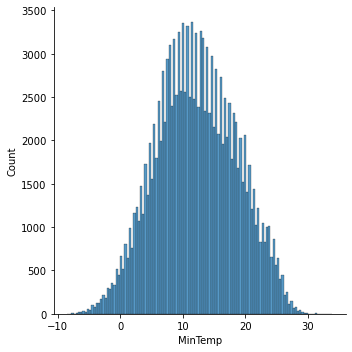

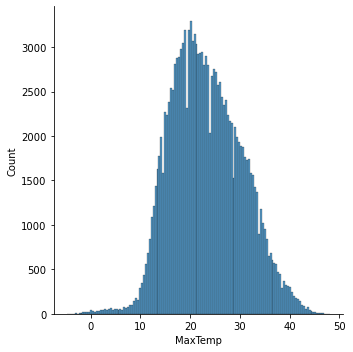

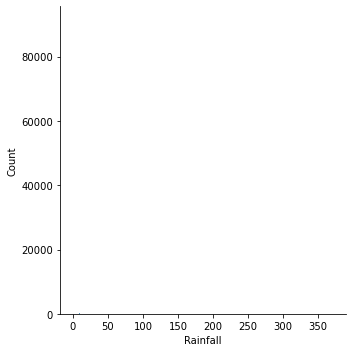

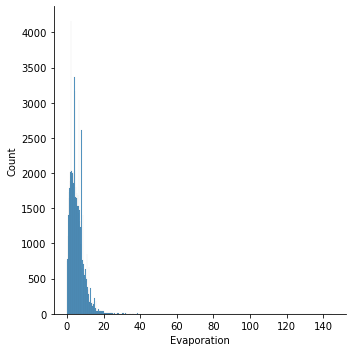

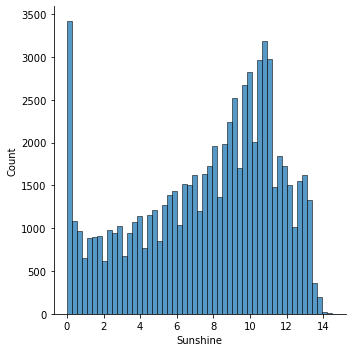

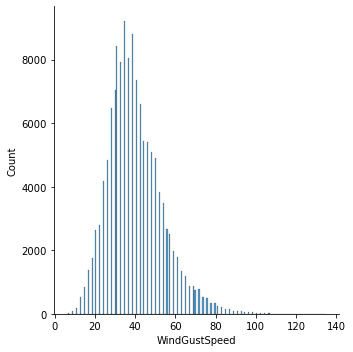

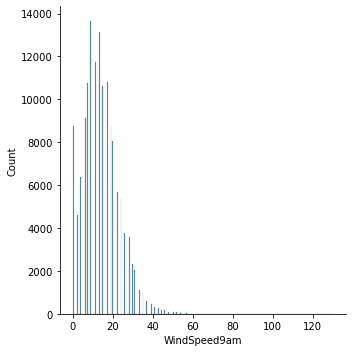

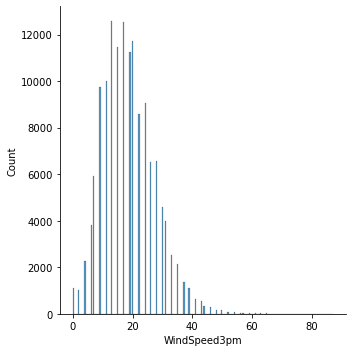

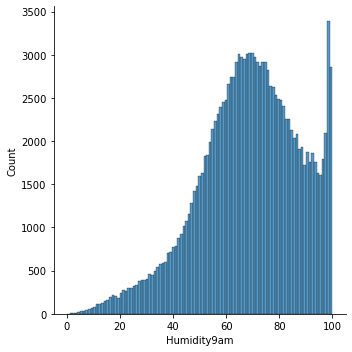

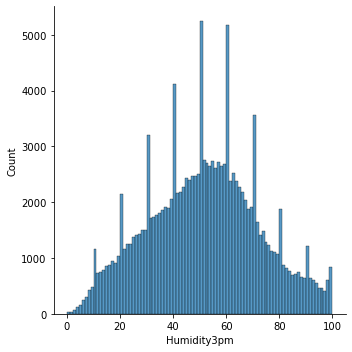

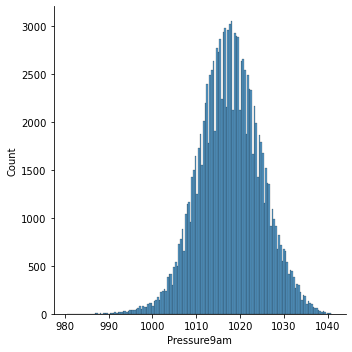

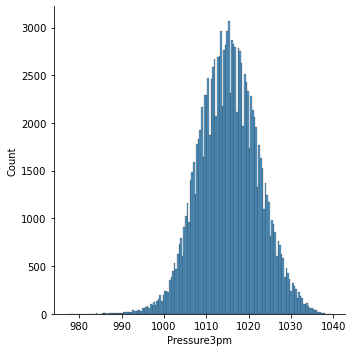

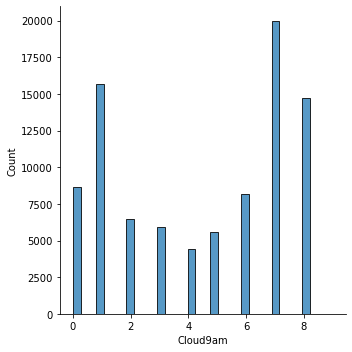

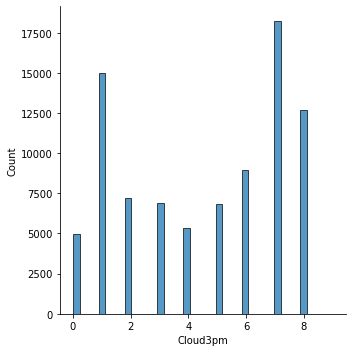

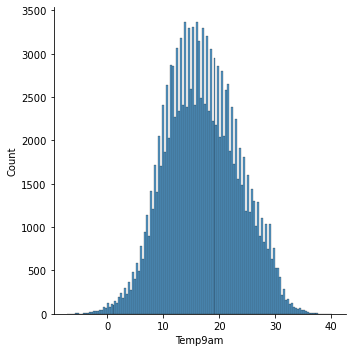

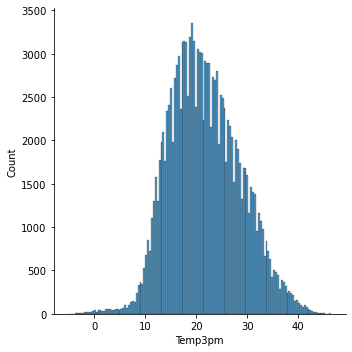

In [13]:
import seaborn as sns
for i in numerical_features:
    sns.displot(weather[i])
    plt.show()



### Identity outlier

In [18]:
# Interquantitle Range  function for boxplot
def iqr(weather,col):
    q1,q3 = np.percentile(weather[col],[25,75])
    iqr = q3-q1 
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    weather = weather[(weather[col]>lower) & (weather[col]<upper)]
    weather.boxplot(col)

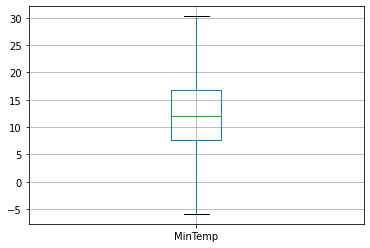

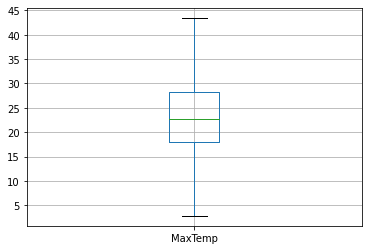

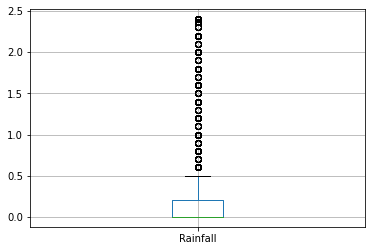

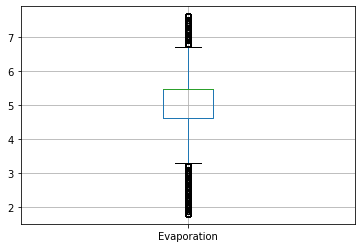

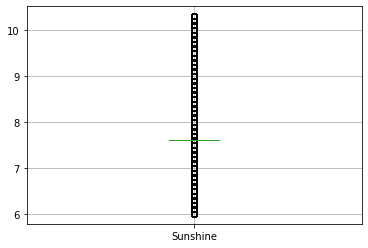

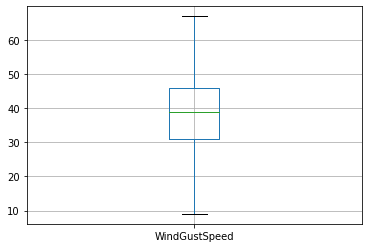

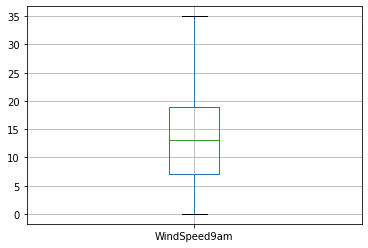

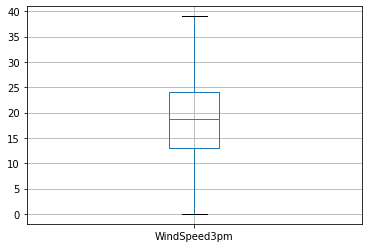

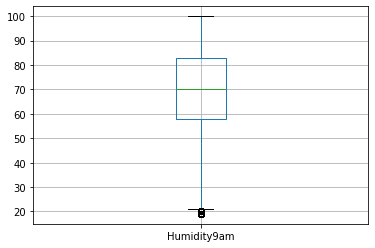

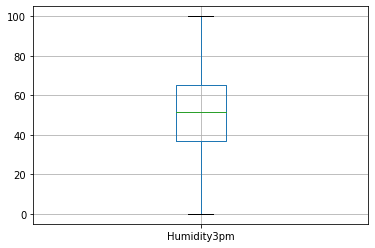

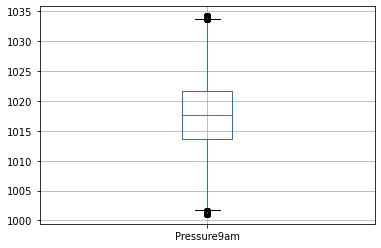

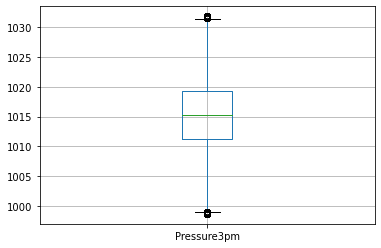

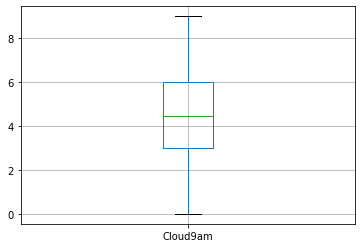

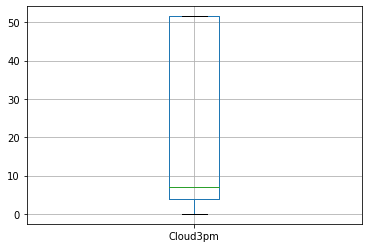

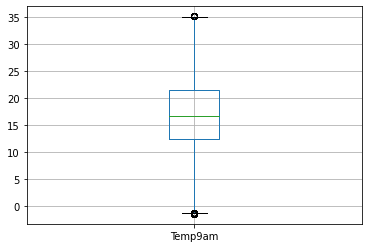

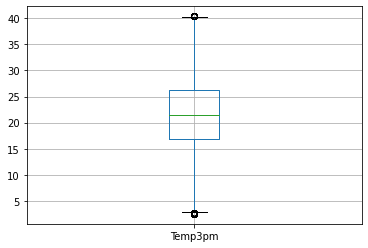

In [19]:
# box plot
for i in numerical_features:
    iqr(weather,i)
    plt.show()

In [20]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,51.539116,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,51.539116,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,51.539116,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [23]:
weather.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.000000,0.733400,0.102706,0.351321,0.051297,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.062151,-0.141572,0.897692,0.699211,0.042997,-0.202730,0.002347
MaxTemp,0.733400,1.000000,-0.074040,0.438653,0.328931,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,-0.225315,-0.079473,0.879170,0.968713,0.061720,-0.163100,0.000609
Rainfall,0.102706,-0.074040,1.000000,-0.037863,-0.170973,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.171144,-0.019905,0.011069,-0.077684,-0.008868,-0.031009,0.001693
Evaporation,0.351321,0.438653,-0.037863,1.000000,0.288169,0.147353,0.139968,0.094352,-0.373732,-0.286025,-0.210961,-0.230351,-0.150264,-0.027014,0.414592,0.425573,0.061981,-0.020194,-0.004560
Sunshine,0.051297,0.328931,-0.170973,0.288169,1.000000,-0.023844,0.003843,0.037836,-0.348855,-0.443121,0.031406,-0.014815,-0.532497,-0.055223,0.208580,0.346685,0.006072,0.017589,-0.000286
WindGustSpeed,0.172553,0.065895,0.126446,0.147353,-0.023844,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.052417,-0.049967,0.145904,0.031884,-0.029264,0.058778,-0.008736
WindSpeed9am,0.173404,0.014294,0.085925,0.139968,0.003843,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.019714,-0.108282,0.127592,0.004476,-0.018306,0.050927,-0.008733
WindSpeed3pm,0.173058,0.049717,0.056527,0.094352,0.037836,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.041611,-0.079410,0.161060,0.027587,-0.029333,0.059683,-0.009841
Humidity9am,-0.230970,-0.497927,0.221380,-0.373732,-0.348855,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,0.353490,0.081149,-0.469641,-0.490709,0.009757,-0.089981,0.015028
Humidity3pm,0.005995,-0.498760,0.248905,-0.286025,-0.443121,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,0.398762,0.031929,-0.216964,-0.555608,-0.009463,-0.018568,0.012813


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in weather.select_dtypes(include='object').columns:
    weather[i] = le.fit_transform(weather[i].astype(str))
# it's transforming the data type of the column to string and then using the label encoder 
# to convert the column to numerical values. 
# This is useful for machine learning algorithms which only work with numbers.

In [26]:
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,51.539116,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,51.539116,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.000000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,51.539116,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [27]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

## Model 1: Logistic Regression

In [29]:
x = weather.drop(['RainTomorrow'],axis=1).values # Predictor value
y = weather['RainTomorrow'].values # Target value

In [30]:
import time
start_time = time.time()
# Build train test model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(101822, 24)
(101822,)
(43638, 24)
(43638,)


In [31]:
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# Fit Model
log_reg.fit(x_train, y_train)
#Predict values
y_pred = log_reg.predict(x_test)
end_time = time.time()
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [33]:
# predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.
# 0 is for probability of no rain and 1 is for probability of rain
log_reg.predict_proba(x_test)[:,0]

array([0.98145446, 0.4274255 , 0.82867231, ..., 0.94471647, 0.80942157,
       0.33623809])

In [34]:
log_reg.predict_proba(x_test)[:,1]

array([0.01854554, 0.5725745 , 0.17132769, ..., 0.05528353, 0.19057843,
       0.66376191])

### Classification Metrics Evaluation 

In [35]:
# Accuaracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) * 100
acc

# Precision Score
from sklearn.metrics import precision_score
prec = precision_score(y_test,y_pred)
prec = prec*100

# Recall Score
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred) #Average ='micro' used only for multi class only
recall = recall*100

print('Accuarcy_Score is:', acc)
print('Precision_Score is:',prec)
print('Recall_Score is:',recall)

Accuarcy_Score is: 84.22934139969752
Precision_Score is: 71.02352391338215
Recall_Score is: 47.58375952405803


In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[32197,  1860],
       [ 5022,  4559]], dtype=int64)

- 26,805+3,725 =30,530 correct predictions,
- 1,497 Type I errors( False Positives),  
- 4,338 Type II errors( False Negatives)

In [37]:
print('Training set score: {:.4f}'.format(log_reg.score(x_train, y_train)*100))
print('Test set score: {:.4f}'.format(log_reg.score(x_test, y_test)*100))
# two values are quite comparable. So, there is no question of overfitting.

Training set score: 84.2539
Test set score: 84.2293


In [38]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     34057
           1       0.71      0.48      0.57      9581

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



## Model 2: Random Forest Classifier

In [39]:
x = weather.drop(['RainTomorrow'],axis=1).values # Predictor value
y = weather['RainTomorrow'].values # Target value

In [40]:
rf_start_time = time.time()
# Build train test model
from sklearn.model_selection import train_test_split
x_train_rf,x_test_rf,y_train_rf,y_test_rf = train_test_split(x,y,test_size=0.3,random_state=33) 
print(x_train_rf.shape)
print(y_train_rf.shape)
print(x_test_rf.shape)
print(y_test_rf.shape)

(101822, 24)
(101822,)
(43638, 24)
(43638,)


In [41]:
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_rf = scaler.fit_transform(x_train_rf)
x_test_rf = scaler.transform(x_test_rf)

In [42]:
#Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
#Init RandomForestCkassifier()
rf = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33)
rf.fit(x_train_rf, y_train_rf)

# Predicted the result
y_pred_rf= rf.predict(x_test_rf)
y_pred_rf
rf_end_time = time.time()

In [43]:
# Making a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[32557,  1500],
       [ 4783,  4798]], dtype=int64)

In [44]:
# check the accuracy score
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test_rf, y_pred_rf)
acc_rf =acc_rf*100
acc_rf
# Precision Score
from sklearn.metrics import precision_score
prec_rf = precision_score(y_test_rf,y_pred_rf)
prec_rf= prec_rf*100
# Recall Score
from sklearn.metrics import recall_score
recall_rf = recall_score(y_test_rf,y_pred_rf) #Average ='micro' used only for multi class only
recall_rf = recall_rf*100
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34057
           1       0.76      0.50      0.60      9581

    accuracy                           0.86     43638
   macro avg       0.82      0.73      0.76     43638
weighted avg       0.85      0.86      0.84     43638



In [45]:
print('RandomForestClassifierModel Train Score is : {:.4f}'.format(rf.score(x_train_rf, y_train_rf)*100))
print('RandomForestClassifierModel Test Score is : {:.4f}'.format(rf.score(x_test_rf, y_test_rf)*100))

RandomForestClassifierModel Train Score is : 97.9336
RandomForestClassifierModel Test Score is : 85.6020


## Model 3: Decision Tree Classifier

In [46]:
x = weather.drop(['RainTomorrow'],axis=1).values # Predictaor value
y = weather['RainTomorrow'].values # Target value

In [47]:
dt_start_time = time.time()
# Build train test model
from sklearn.model_selection import train_test_split
x_train_dt,x_test_dt,y_train_dt,y_test_dt = train_test_split(x,y,test_size=0.3,random_state=33) 
print(x_train_dt.shape)
print(y_train_dt.shape)
print(x_test_dt.shape)
print(y_test_dt.shape)

(101822, 24)
(101822,)
(43638, 24)
(43638,)


In [48]:
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_dt = scaler.fit_transform(x_train_dt)
x_test_dt = scaler.transform(x_test_dt)

In [49]:
# import the Decision tree classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier
#initialize the Decision tree model using Entropy (Information Gain)
DT = DecisionTreeClassifier(criterion ='entropy', max_depth=6,random_state= 33)
#fit the DT Model
DT.fit(x_train,y_train)
# Predicted the result
y_pred_dt = DT.predict(x_test_dt)
y_pred_dt
dt_end_time = time.time()

In [50]:
print('Decision Tree Classifier Model Train Score is : ' , DT.score(x_train, y_train)*100)
print('Decision Tree Classifier Model Test Score is : ' , DT.score(x_test, y_test)*100)

Decision Tree Classifier Model Train Score is :  84.18711084048634
Decision Tree Classifier Model Test Score is :  83.78477473761401


In [51]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test_dt, y_pred_dt)
cm_dt

array([[32092,  1965],
       [ 5111,  4470]], dtype=int64)

In [52]:
# check the accuracy score
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test_dt, y_pred_dt)
acc_dt =acc_dt*100
# Precision Score
from sklearn.metrics import precision_score
prec_dt = precision_score(y_test_dt,y_pred_dt)
prec_dt = prec_dt*100
# Recall Score
from sklearn.metrics import recall_score
recall_dt = recall_score(y_test_dt,y_pred_dt) #Average ='micro' used only for multi class only
recall_dt = recall_dt*100
print('Accuarcy_Score is:', acc_dt)
print('Precision_Score is:',prec_dt)
print('Recall_Score is:',recall_dt)
print(classification_report(y_test_dt, y_pred_dt))

Accuarcy_Score is: 83.78477473761401
Precision_Score is: 69.46386946386947
Recall_Score is: 46.65483769961382
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     34057
           1       0.69      0.47      0.56      9581

    accuracy                           0.84     43638
   macro avg       0.78      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



## Model 4: SVC - linear

In [53]:
x = weather.drop(['RainTomorrow'],axis=1).values # Predictor value
y = weather['RainTomorrow'].values # Target value

In [54]:
svc_start_time = time.time()
# Build train test model
from sklearn.model_selection import train_test_split
x_train_svc,x_test_svc,y_train_svc,y_test_svc = train_test_split(x,y,test_size=0.3,random_state=33) 
print(x_train_svc.shape)
print(y_train_svc.shape)
print(x_test_svc.shape)
print(y_test_svc.shape)

(101822, 24)
(101822,)
(43638, 24)
(43638,)


In [55]:
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_svc = scaler.fit_transform(x_train_svc)
x_test_svc = scaler.transform(x_test_svc)

In [56]:
# import support vector machine from scikit learn
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear')
# Fitting the dataset
svc_linear.fit(x_train_svc, y_train_svc)
#training begin
# Prediction - always use X_test
y_pred_svc = svc_linear.predict(x_test_svc)
y_pred_svc
svc_end_time = time.time()

In [57]:
print('Support Vecotr Machine Model Train Score is : ' , svc_linear.score(x_train_svc, y_train_svc)*100)
print('Support Vecotr Machine Model Test Score is : ' , svc_linear.score(x_test_svc, y_test_svc)*100)

Support Vecotr Machine Model Train Score is :  84.22344876352851
Support Vecotr Machine Model Test Score is :  84.167468719923


In [58]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc=confusion_matrix(y_test_svc, y_pred_svc)
cm_svc

array([[32493,  1564],
       [ 5345,  4236]], dtype=int64)

In [59]:
# check the accuracy score
from sklearn.metrics import accuracy_score
acc_svc=accuracy_score(y_test_svc, y_pred_svc)
acc_svc =acc_svc*100
# Precision Score
from sklearn.metrics import precision_score
prec_svc = precision_score(y_test_svc,y_pred_svc)
prec_svc= prec_svc*100

from sklearn.metrics import recall_score
recall_svc = recall_score(y_test_svc,y_pred_svc) #Average ='micro' used only for multi class only
recall_svc = recall_svc*100
from sklearn.metrics import classification_report
print('Accuarcy_Score is:', acc_svc)
print('Precision_Score is:',prec_svc)
print('Recall_Score is:',recall_svc)
print(classification_report(y_test_svc, y_pred_svc))

Accuarcy_Score is: 84.167468719923
Precision_Score is: 73.03448275862068
Recall_Score is: 44.21250391399646
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34057
           1       0.73      0.44      0.55      9581

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



In [60]:
# To read accuracy score of different models in dataframe
df_modelAcc = pd.DataFrame({'Logistic Regression': [acc],
                            'Random Forest': [acc_rf],
                            'Decision Tree': [acc_dt],
                            'SVC Linear': [acc_svc]})
df_modelAcc

,Logistic Regression,Random Forest,Decision Tree,SVC Linear
0,84.229341,85.601998,83.784775,84.167469


In [61]:
# Select the 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear' columns
series = df_modelAcc[['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear']]
series = series.squeeze()
df = series.to_frame()
df = df.reset_index()
df.columns = ['Model','Accuracy Score']
df['Accuracy Score'] = df['Accuracy Score'].apply(lambda x: f'{x/100:.2%}')
df.sort_values(by="Accuracy Score", ascending= False)

,Model,Accuracy Score
1,Random Forest,85.60%
0,Logistic Regression,84.23%
3,SVC Linear,84.17%
2,Decision Tree,83.78%


In [62]:
lr_time = round(end_time - start_time,3)
rf_time = round(rf_end_time - rf_start_time,3)
dt_time = round(dt_end_time - dt_start_time,3)
svc_time = round(svc_end_time - svc_start_time,3)

# To read time score of different models in dataframe
df_modelTime = pd.DataFrame({'Logistic Regression': [lr_time],
                   'Random Forest': [rf_time],
                   'Decision Tree': [dt_time],
                   'SVC Linear': [svc_time]})
df_modelTime

,Logistic Regression,Random Forest,Decision Tree,SVC Linear
0,0.408,21.787,1.002,1468.513


In [67]:
 #Select the 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear' columns
series2 = df_modelTime[['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear']]
series2 = series2.squeeze()
df2 = series2.to_frame()
df2 = df2.reset_index()
df2.columns = ['Model','Run Time']
df2['Run Time'] = df2['Run Time'].apply(lambda x: f'{x:.3f}s')
df2.sort_values(by="Run Time")

,Model,Run Time
0,Logistic Regression,0.408s
2,Decision Tree,1.002s
3,SVC Linear,1468.513s
1,Random Forest,21.787s


In [64]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test_rf, y_pred_rf))
print(classification_report(y_test_dt, y_pred_dt))
print(classification_report(y_test_svc, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     34057
           1       0.71      0.48      0.57      9581

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34057
           1       0.76      0.50      0.60      9581

    accuracy                           0.86     43638
   macro avg       0.82      0.73      0.76     43638
weighted avg       0.85      0.86      0.84     43638

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     34057
           1       0.69      0.47      0.56      9581

    accuracy                           0.84     43638
   macro avg       0.78      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638

              preci